In [1]:
import function as fn
import layer as ly
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class Loss:
    def __init__(self):
        self.Loss = None
        self.dout = None
    def forward(self, out, t):
        self.Loss = 1/2 * np.sum((out - t)**2)
        self.dout = out - t
        return self.Loss
    def backward(self):
        return self.dout

In [81]:
class BPneuron:
    def __init__(self, W, b, lr):
        #入力側からの重みと自ニューロンへのバイアスの格納
        self.W = W
        self.b = b
        #W、bに対する勾配の入れ物
        self.W_grad = None
        self.b_grad = None
        #活性値と出力を格納
        self.y = None
        self.z = None
        #入力の格納
        self.x = None
        # 学習率の格納
        self.lr = lr
        self.optimizer = fn.SGD(lr)

    def forward(self, x):
        #x格納
        self.x = x
        # y：活性値
        self.y = np.dot(x, self.W) + self.b
        # Z：ニューロンの出力
        self.z = fn.sigmoid(self.y)
        return self.z

    def backward(self, dz):
        # 出力部の逆伝搬（シグモイド版）
        dy = fn.sigmoid_back(z, dz)
        self.b_grad = dy
        self.W_grad = np.dot(self.x.T, dy)
        dx = np.dot(dy, W.T)

        #print("dw:", self.W_grad)
        #print("W:", W)

        # オプティマイザーによりself.W、self.bの値を更新
        self.W = self.optimizer.update(self.W, self.W_grad)
        self.b = self.optimizer.update(self.b, self.b_grad)

        #print("W:", W)

        return dx, dy, self.W, self.b

    def change_lr(self, New_lr):
        self.optimizer.change_lr(New_lr)

In [108]:
t = np.array([[0.6,0.2,0.4]])
input_data = np.array([[0.4,0.1,0.2,-0.9]])
W = np.random.randn(4, 3)
b = np.random.randn(1, 3)
lr = 0.005
h_layer = BPneuron(W, b, lr)

In [109]:
z = h_layer.forward(input_data)

In [110]:
z

array([[0.68404724, 0.91092947, 0.49705535]])

In [111]:
dz = Loss_layer.forward(z,t)

In [112]:
dz

0.26095219581616824

In [113]:
dx,dy, w, b = h_layer.backward(dz)

In [114]:
dz_memo = []
loss_memo = []
b_memo = []
W_memo = []
for i in range (10000):
    z = h_layer.forward(input_data)
    loss = Loss_layer.forward(z,t)
    dz = Loss_layer.backward()
    dx, dy, W, b = h_layer.backward(dz)
    loss_memo.append(loss)
    b_memo.append(b[0][0])
    W_memo.append(W[0][0])
    if i % 100 == 0:
        print("W:",W)
        print("Z:", z)
        print("dz:", dz)
        print("dy:", dy)
        print("b:", b)
        

W: [[-0.41431018  0.63606604 -0.66522485]
 [ 0.61838111  0.71270038 -0.1285361 ]
 [-1.81510167  0.73561815  1.89116185]
 [-0.40591435 -2.29061688  0.26346733]]
Z: [[0.68392026 0.91088572 0.4969004 ]]
dz: [[0.08392026 0.71088572 0.0969004 ]]
dy: [[0.01870604 0.1454143  0.02278919]]
b: [[ 0.87324115 -0.21134622  0.12520293]]
W: [[-0.41796307  0.60716226 -0.66965163]
 [ 0.61746789  0.70547444 -0.1296428 ]
 [-1.81692812  0.72116626  1.88894846]
 [-0.39769533 -2.22558339  0.27342759]]
Z: [[0.67991711 0.89830354 0.49130917]]
dz: [[0.07991711 0.69830354 0.09130917]]
dy: [[0.01783715 0.14360425 0.02150334]]
b: [[ 0.8641089  -0.28360566  0.11413598]]
W: [[-0.42144552  0.57864371 -0.67382832]
 [ 0.61659728  0.6983448  -0.13068697]
 [-1.81866935  0.70690699  1.88686012]
 [-0.38985982 -2.16141664  0.28282515]]
Z: [[0.67607589 0.8843696  0.48603579]]
dz: [[0.07607589 0.6843696  0.08603579]]
dy: [[0.01700113 0.14156153 0.02028707]]
b: [[ 0.85540278 -0.35490204  0.10369425]]
W: [[-0.42476405  0.55055

b: [[ 0.71668293 -1.74254304 -0.0469832 ]]
W: [[-0.47746278  0.01805087 -0.73460485]
 [ 0.60259296  0.55819659 -0.1458811 ]
 [-1.84667798  0.42661057  1.85647185]
 [-0.26382099 -0.90008275  0.41957234]]
Z: [[0.61129602 0.31052308 0.41024009]]
dz: [[0.01129602 0.11052308 0.01024009]]
dy: [[0.00257578 0.02697526 0.00245526]]
b: [[ 0.71535963 -1.75638414 -0.04824707]]
W: [[-0.477964    0.0127944  -0.73508168]
 [ 0.60246766  0.55688247 -0.14600031]
 [-1.84692858  0.42398233  1.85623344]
 [-0.26269325 -0.8882557   0.42064521]]
Z: [[0.61069409 0.30486566 0.40965728]]
dz: [[0.01069409 0.10486566 0.00965728]]
dy: [[0.00243896 0.02561657 0.00231579]]
b: [[ 0.71410659 -1.76952531 -0.04943915]]
W: [[-0.47843858  0.00780164 -0.73553143]
 [ 0.60234901  0.55563428 -0.14611275]
 [-1.84716587  0.42148595  1.85600856]
 [-0.26162545 -0.87702198  0.42165714]]
Z: [[0.61012383 0.29954609 0.4091078 ]]
dz: [[0.01012383 0.09954609 0.0091078 ]]
dy: [[0.0023093  0.02433651 0.00218427]]
b: [[ 0.71292014 -1.78200

W: [[-0.48554398 -0.0739042  -0.74198351]
 [ 0.60057266  0.53520782 -0.14772577]
 [-1.85071857  0.38063303  1.85278252]
 [-0.2456383  -0.69318383  0.43617433]]
Z: [[0.60155075 0.2205835  0.4012506 ]]
dz: [[0.00155075 0.0205835  0.0012506 ]]
dy: [[0.00035463 0.00508378 0.0003004 ]]
b: [[ 0.69515665 -1.98627183 -0.06669373]]
W: [[-0.48561295 -0.07489932 -0.74204186]
 [ 0.60055542  0.53495904 -0.14774035]
 [-1.85075306  0.38013547  1.85275335]
 [-0.2454831  -0.69094483  0.43630561]]
Z: [[0.60146721 0.21972037 0.40117977]]
dz: [[0.00146721 0.01972037 0.00117977]]
dy: [[0.00033553 0.00487106 0.00028339]]
b: [[ 0.6949842  -1.98875961 -0.0668396 ]]
W: [[-0.48567822 -0.07585284 -0.7420969 ]
 [ 0.6005391   0.53472066 -0.14775411]
 [-1.85078569  0.37965871  1.85272583]
 [-0.24533626 -0.6887994   0.43642945]]
Z: [[0.60138816 0.21889558 0.40111296]]
dz: [[0.00138816 0.01889558 0.00111296]]
dy: [[0.00031746 0.00466776 0.00026734]]
b: [[ 0.69482104 -1.99114342 -0.0669772 ]]
W: [[-0.48573997 -0.07676

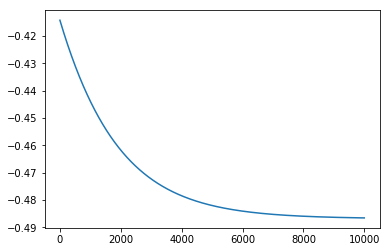

In [115]:
plt.plot(W_memo)

In [116]:
loss_memo

[0.26089540126433813,
 0.2608016064842084,
 0.2607077431193146,
 0.26061381116135945,
 0.2605198106022634,
 0.2604257414341649,
 0.2603316036494204,
 0.26023739724060496,
 0.2601431222005127,
 0.2600487785221582,
 0.25995436619877454,
 0.2598598852238157,
 0.2597653355909566,
 0.2596707172940923,
 0.25957603032734033,
 0.259481274685039,
 0.2593864503617496,
 0.2592915573522559,
 0.2591965956515643,
 0.25910156525490485,
 0.2590064661577309,
 0.2589112983557208,
 0.2588160618447764,
 0.25872075662102506,
 0.2586253826808193,
 0.2585299400207374,
 0.25843442863758354,
 0.2583388485283879,
 0.2582431996904087,
 0.25814748212112976,
 0.2580516958182637,
 0.25795584077975053,
 0.2578599170037586,
 0.25776392448868496,
 0.25766786323315605,
 0.25757173323602756,
 0.2574755344963846,
 0.257379267013543,
 0.2572829307870491,
 0.25718652581668006,
 0.25709005210244407,
 0.2569935096445818,
 0.25689689844356506,
 0.2568002185000986,
 0.25670346981512004,
 0.2566066523897999,
 0.2565097662255424

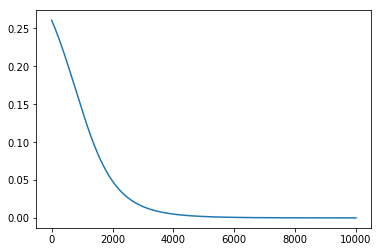

In [117]:
plt.plot(loss_memo)

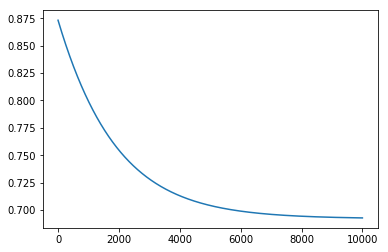

In [118]:
plt.plot(b_memo)